In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
egdi_2003 = pd.read_csv('EGOV_DATA_2003.csv')
egdi_2004 = pd.read_csv('EGOV_DATA_2004.csv')
egdi_2005 = pd.read_csv('EGOV_DATA_2005.csv')
egdi_2008 = pd.read_csv('EGOV_DATA_2008.csv')
egdi_2010 = pd.read_csv('EGOV_DATA_2010.csv')
egdi_2012 = pd.read_csv('EGOV_DATA_2012.csv')
egdi_2014 = pd.read_csv('EGOV_DATA_2014.csv')
egdi_2016 = pd.read_csv('EGOV_DATA_2016.csv')
egdi_2018 = pd.read_csv('EGOV_DATA_2018.csv')
egdi_2020 = pd.read_csv('EGOV_DATA_2020.csv')
egdi_2022 = pd.read_csv('EGOV_DATA_2022.csv')
egdi_2024 = pd.read_csv('EGOV_DATA_2024.csv')

In [23]:
egdi = pd.concat([
    egdi_2003,
    egdi_2004,
    egdi_2005,
    egdi_2008,
    egdi_2010,
    egdi_2012,
    egdi_2014,
    egdi_2016,
    egdi_2018,
    egdi_2020,
    egdi_2022,
    egdi_2024
]).reset_index(drop=True)

In [24]:
egdi = egdi[egdi['Survey Year'] == 2024].reset_index(drop=True)

In [25]:
import itertools


egdi = egdi.iloc[:, itertools.chain([1], range(3,8))]

In [26]:
egdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country Name                            193 non-null    object 
 1   E-Government Index                      193 non-null    float64
 2   E-Participation Index                   193 non-null    float64
 3   Online Service Index                    193 non-null    float64
 4   Human Capital Index                     193 non-null    float64
 5   Telecommunication Infrastructure Index  193 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.2+ KB


In [27]:
egdi_melt = egdi.melt(
    id_vars='Country Name',
    value_vars=[
        'E-Government Index',
        'E-Participation Index',
        'Online Service Index',
        'Human Capital Index',
        'Telecommunication Infrastructure Index'
    ],
    var_name='Métrica',
    value_name='Escala'
)

In [28]:
egdi_melt = egdi_melt.iloc[:, [1,2]]

In [29]:
egdi_melt

,Métrica,Escala
0,E-Government Index,0.45721
1,E-Government Index,0.91377
2,E-Government Index,0.90143
3,E-Government Index,0.83557
4,E-Government Index,0.66777
...,...,...
960,Telecommunication Infrastructure Index,0.73285
961,Telecommunication Infrastructure Index,0.92206
962,Telecommunication Infrastructure Index,0.89126
963,Telecommunication Infrastructure Index,0.98806


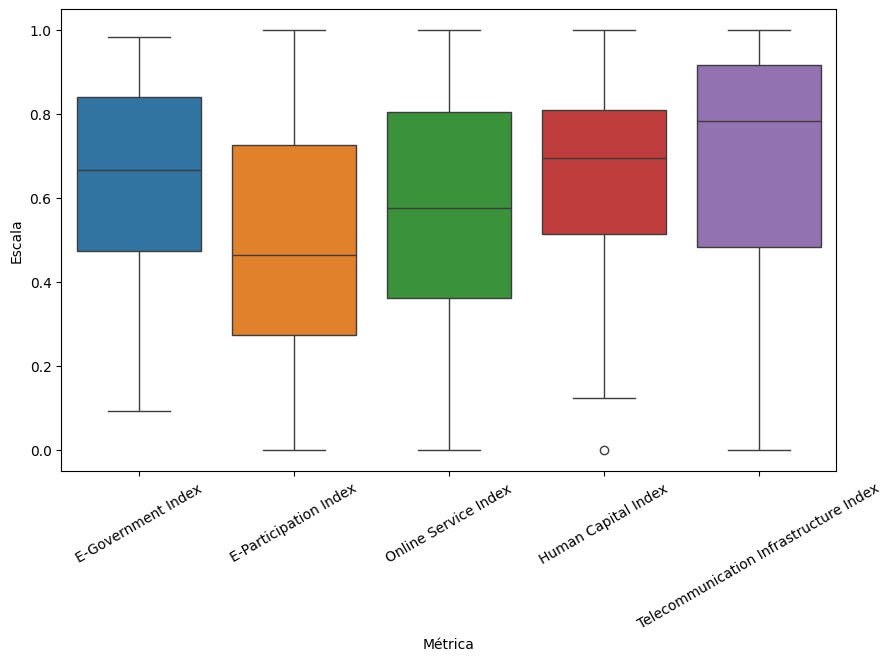

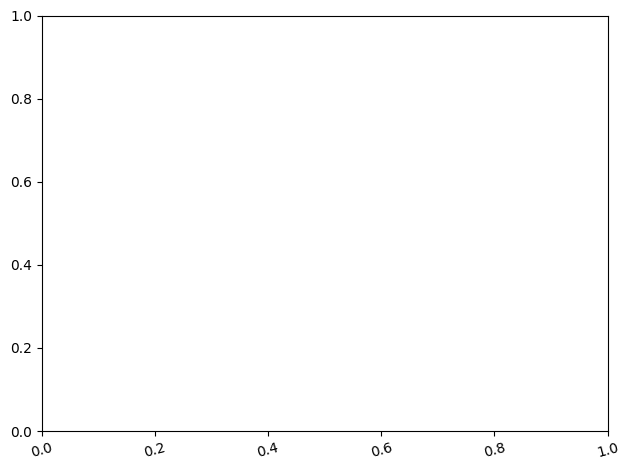

In [30]:
from matplotlib.pyplot import savefig

plt.figure(figsize=(10, 6))

sns.boxplot(data=egdi_melt, hue='Métrica', x='Métrica', y='Escala', palette='tab10')

plt.xticks(rotation=30)
plt.figure(savefig('C:/Users/lazar/Master-Dissertation/figuras/egdi/boxplot_egdi_global.png'))
sns.despine()
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()